# Статистика, DS-поток
## Задание SP.10

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание.**

Практика:
* Задача P1 &mdash; 20 баллов;
* Задача P2 &mdash; 30 баллов;
* Задача P3 &mdash; 90 баллов;
* Задача P4 &mdash; 100 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P1-P3;
* *средняя:* задача P4.

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [27]:
# Bot check

# HW_ID: ds_sp10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
from statsmodels.stats.multitest import multipletests as mult

_____
### Задача P1. 20 баллов
Были проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.




|| Количество пациентов   | Количество случаев возникновения тошноты |
|-----------| ----------- | -------|
|Плацебо|80|45|
|Хлорпромазин|75|26|
|Дименгидринат|85|52|
|Пентобарбитал (100 мг)|67|35|
|Пентобарбитал (150 мг)|85|37|




Проведите сравнение каждого препарата по эффективности по отношению к плацебо. Какие ответы можно получить для методов, контролирующих FWER и FDR? В каждом случае приведите скорректированные p-value.

*Замечание.* Используйте [`multipletests`](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html) из библиотеки `statsmodels`.

**Решение:**

In [29]:
df = pd.DataFrame({  # таблица из условия
    'Препарат': ['Плацебо', 'Хлорпромазин', 'Дименгидринат', 'Пентобарбитал 100 мг', 'Пентобарбитал 150 мг'],
    'Кол-во пациентов': [80, 75, 85, 67, 85],
    'Кол-во случаев тошноты': [45, 26, 52, 35, 37]
})

p_values = []  # препарат (cur) vs плацебо (placebo)
for i in df.index[1:]: 
    placebo_m, cur_m = [df.loc[x, 'Кол-во пациентов'] for x in (0,i)]
    placebo_n, cur_n = [df.loc[x, 'Кол-во случаев тошноты'] for x in (0,i)]
    _, p, _, _ = sps.chi2_contingency(np.array([[placebo_n, placebo_m-placebo_n], [cur_n, cur_m-cur_n]]))
    p_values.append(p)

display(pd.DataFrame({
    'Препарат': df['Препарат'][1:],
    'p-value': p_values,
    'p-value, FWER': mult(p_values, method='bonferroni')[1],
    'p-value, FDR': mult(p_values, method='fdr_bh')[1]
}))

,Препарат,p-value,"p-value, FWER","p-value, FDR"
1,Хлорпромазин,0.011280,0.045120,0.045120
2,Дименгидринат,0.628178,1.000000,0.748912
3,Пентобарбитал 100 мг,0.748912,1.000000,0.748912
4,Пентобарбитал 150 мг,0.139543,0.558172,0.279086


***Вывод:** о статзначимости можно говорить, если скорректированный p-value оказался < 0.05. Согласно полученной таблице, лучше плацебо работает только хлорпромазин. Отметим, что результаты FWER и FDR немного отличаются, поэтому важно смотреть на задачу комплексно, проводя разные тесты*

_____
### Задача P2. 20 баллов

Пусть $X_1, ..., X_n \sim Bern(p)$.
Известно, что $S_n = \left\{\sum_{i=1}^n x_i > c_{n,\alpha}\right\}$ является равномерно наиболее мощным критерием для проверки $\mathsf{H}_0\colon p=1/2\ vs.\ \mathsf{H}_1\colon p>1/2$, где $\alpha$ &mdash; уровень значимости.

Некоторая компания решила воспользоваться этим критерием для решения одной своей задачи. Например, это может быть исследование конверсии в клик, заполнении формы, указания номера телефона, и тд. Конверсия &mdash; доля пользователей, которая совершит определенное целевое действие.

Данные приходят онлайн, но не так часто. Для простоты задачи будем считать, что данные приходят по одному наблюдению в сутки. Однако, маркетологи не хотят долго ждать, и решают проверять гипотезу каждый день с помощью имеющихся на текущий момент данных.
То есть в $k$-й день они пользуются критерием $S_k$, имея выборку $X_1, ..., X_k$.
Если же в один из дней соответствующий критерий дает положительный результат (т.е. отклоняет $\mathsf{H}_0$), то маркетологи завершают наблюдения, иначе &mdash; продолжают тестирование.

Промоделируйте подобную процедуру в течение 100 дней в предположении справедливости $\mathsf{H}_0$.

In [30]:
np.random.seed(42)

def days_to_reject(days=100, p_null=0.5, alpha=0.05):
    results = []  # отклоняем h0?
    for day in range(1, days+1+1):  # доп. день, чтобы учесть конец эксперимента
        res = np.sum(np.random.binomial(1, p_null, day)) > sps.binom.ppf(1-alpha, day, p_null)
        results.append(res)
        if res:
            break  # отклонили h0 -> завершаем тест
    return len(results)

print(f'h0 отклонили за {days_to_reject(days=100)} дней')

h0 отклонили за 23 дней


Повторите данный эксперимент достаточное количество раз и по результатам оцените вероятность ошибки I рода в случае если компания проводит эксперимент не более $n$ дней. Постройте ее график в зависимости от $n$.

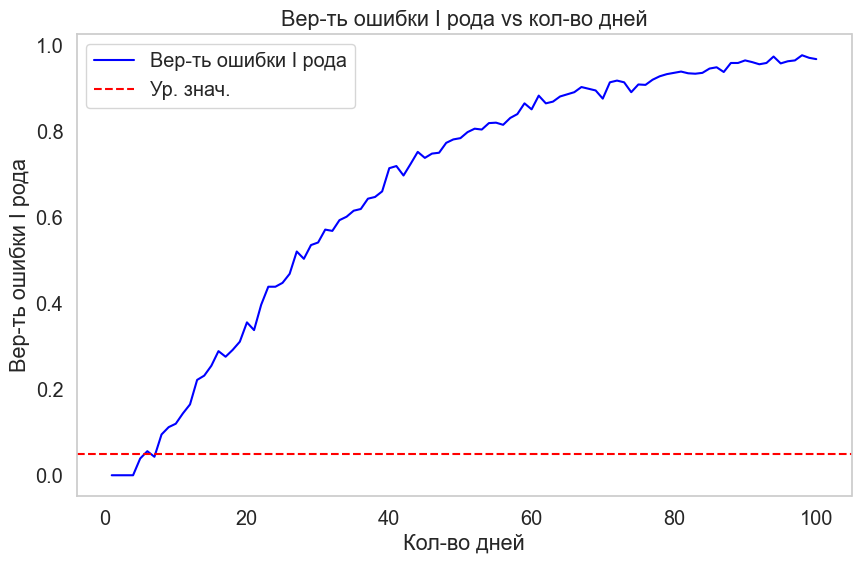

In [31]:
N = 1000  # кол-во повторов экспериментов
P_I = [sum([days_to_reject(n)<=n for _ in range(N)])/N for n in range(1,101)]  # вер-ти ошибки I рода

plt.figure(figsize=(10, 6))
plt.plot(range(1,101), P_I, label='Вер-ть ошибки I рода', color='blue')
plt.axhline(y=0.05, color='red', linestyle='--', label='Ур. знач.')
plt.title('Вер-ть ошибки I рода vs кол-во дней')
plt.xlabel('Кол-во дней')
plt.ylabel('Вер-ть ошибки I рода')
plt.legend()
plt.grid()
plt.show()

Сделайте выводы

*Чем дольше идет эксперимент, тем выше вероятность ошибки I рода. Задача наглядно показывает, насколько легко "подогнать" результат под желаемый, прервав эксперимент в удачный момент. Поэтому логично, что длительность эксперимента нужно фиксировать заранее*

*Замечание.* В статистике (в т.ч. в АБ-тестировании) подобный эффект называется *проблемой подглядывания* (peeking problem). Размер выборки для применения критерия должен быть определен заранее, его нельзя как-то сокращать на основе полученных данных, даже если бизнесу очень хочется.

___________
### Задача P3.

*Примечание.* Задача достаточно простая, кода здесь мало. Основное количество баллов дается за ответы на вопросы. Не забывайте также смотреть в ноутбуки с семинаров.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все признаки, кроме `Class`.

In [32]:
data = pd.read_csv("wine.data", header=None)
data.columns = [
    "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
    "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline", "Class"
]
data.drop('Class', axis=1, inplace=True)

Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

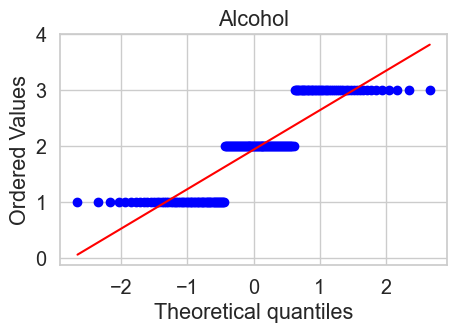

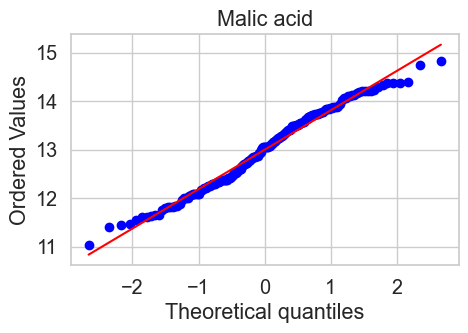

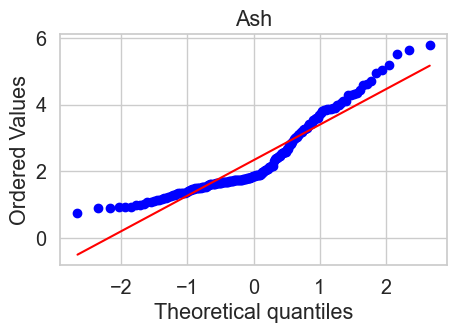

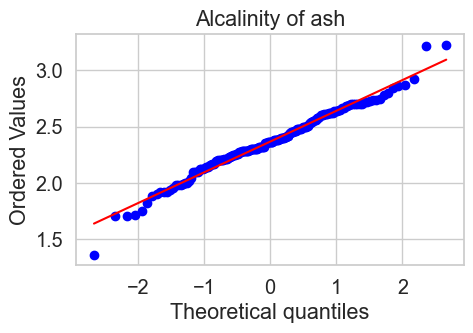

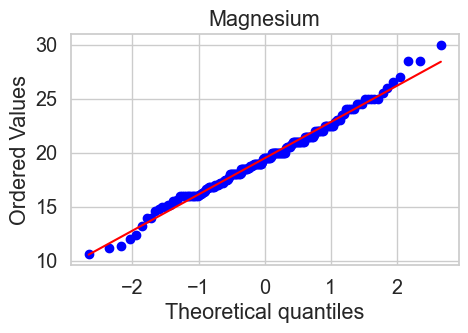

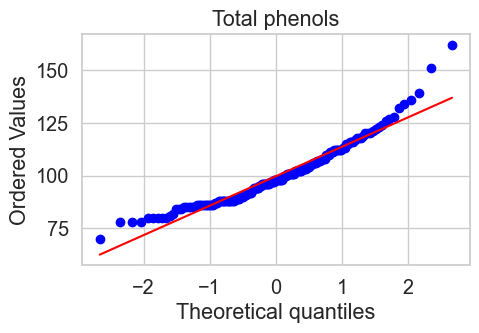

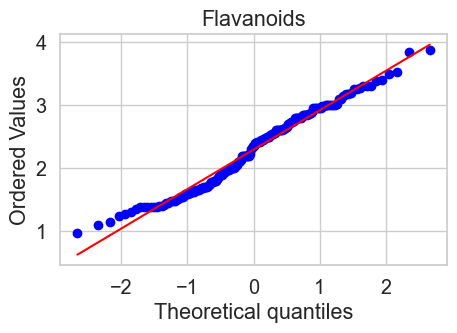

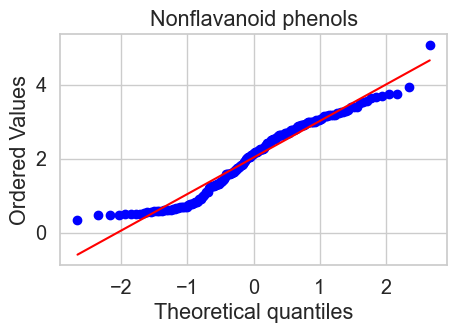

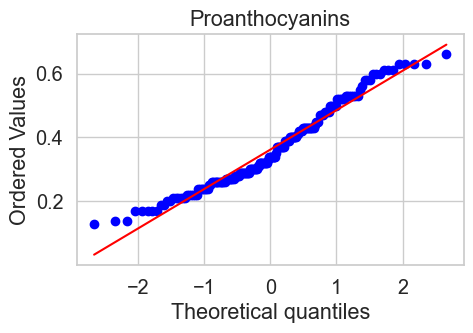

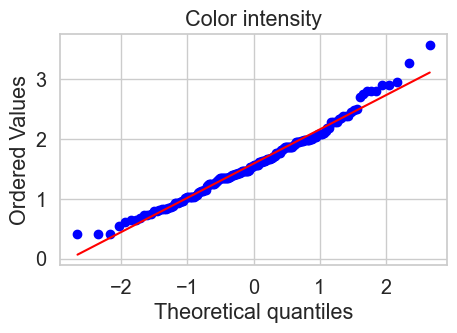

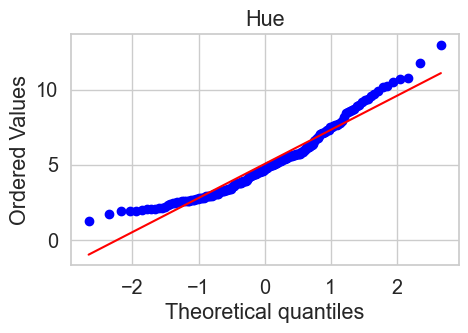

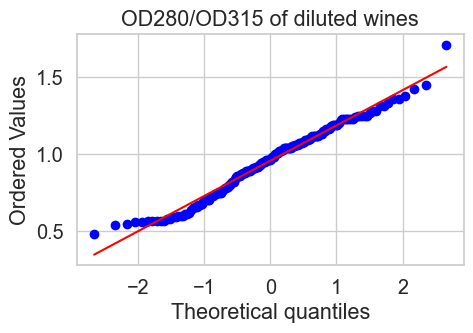

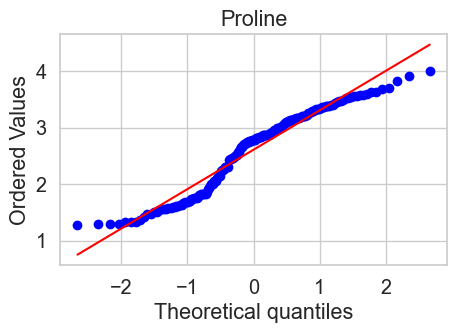

In [33]:
for col in data.columns:
    plt.figure(figsize=(5,3))
    sps.probplot(data[col], plot=plt.subplot(111))
    plt.title(col)
    plt.show()

Для каких признаков можно говорить об их нормальности и почему?

***Ответ:** во всех случаях (кроме категориального признака Alcohol) точки лежат довольно близко к диагонали. Т.е. на глаз все признаки можно считать нормальными (с некоторой погрешностью)*

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. Помочь в этом может теоретический материал и выполненные ранее задачи.

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

***Ответ:** Жарка-Бера, Шапиро-Уилка*

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

***Ответ:** нужен контроль FWER (чем больше тестов, тем проще совершить ошибку I рода)*

Какой метод для контроля FWER стоит применить и почему?

***Ответ:** метод Холма (в сравнении с Бонферони, мощность Холма больше)*

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

***Ответ:** пусть для каждого признака h0: данный признак нормален. Отвергнем h0, eсли скорректированное p-value > ур.знач.*

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

***Ответ:** данные похожи на нормальные, но утверждать нормальность нельзя (назовем такие признаки потенциально нормальными)*

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу.

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [34]:
tests = {'Жарка-Бера':sps.jarque_bera, 'Шапиро-Уилка':sps.shapiro}
p_values = pd.DataFrame({name:[f(data[col])[1] for col in data.columns] for name,f in tests.items()})
reject, adj_p_values = mult(p_values.values.ravel(), method='holm')[:2]
reject, adj_p_values = reject.reshape(-1,2).astype(int), adj_p_values.reshape(p_values.shape).round(3)
res = pd.DataFrame({
    'Признак':data.columns,
    'adj p-value Шапиро-Уилка':adj_p_values[:,0],
    'Итог Шапиро-Уилка':reject[:,0],
    'adj p-value Жарка-Бера':adj_p_values[:,1],
    'Итог Жарка-Бера':reject[:,1]
})
display(res)

,Признак,adj p-value Шапиро-Уилка,Итог Шапиро-Уилка,adj p-value Жарка-Бера,Итог Жарка-Бера
0,Alcohol,0.021,1,0.000,1
1,Malic acid,0.316,0,0.160,0
2,Ash,0.000,1,0.000,1
3,Alcalinity of ash,0.102,0,0.271,0
4,Magnesium,0.753,0,0.753,0
5,Total phenols,0.000,1,0.000,1
6,Flavanoids,0.316,0,0.062,0
7,Nonflavanoid phenols,0.316,0,0.000,1
8,Proanthocyanins,0.118,0,0.002,1
9,Color intensity,0.102,0,0.145,0


Для каких признаков нормальность не отвергается?

In [35]:
print("Потенциально нормальные признаки:")
print(*res[(res['Итог Жарка-Бера']==0) & (res['Итог Шапиро-Уилка']==0)]['Признак'].values, sep=', ')

Потенциально нормальные признаки:
Malic acid, Alcalinity of ash, Magnesium, Flavanoids, Color intensity, OD280/OD315 of diluted wines


***Ответ:** признаки Malic acid, Alcalinity of ash, Magnesium, Flavanoids, Color intensity, OD280/OD315 of diluted wines похожи на нормальные (утверждать нормальность нельзя, но точно нельзя отвергнуть)*

***Вывод:** видно, что результат отличается от проверки "на глаз", что подчеркивает пользу статтестов*

---
### Задача P4.

Исследуем влияние методов коррекции при множественной проверке гипотез на различные показатели качества.

**Теоретическая справка**

Приведем определения всех составляющих:
* $V_{\mathsf{P} S}(X)$ &mdash; количество верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $R_S(X)$ &mdash; количество отвергнутых гипотез критерием $S$ по выборке $X$,
* $U_{\mathsf{P} S}(X)$ &mdash; количество *не*верных гипотез, которые были отвергнуты для $\mathsf{P}$ критерием $S$ по выборке $X$,
* $T_{\mathsf{P}}$ &mdash; количество *не*верных гипотез для $\mathsf{P}$.

Тогда характеристики определяются следующим образом.
* Вероятность хотя бы одного неверного отвержения
$$FWER = \mathsf{P}(V_{\mathsf{P} S}(X) > 0).$$

* Ожидаемая доля ложных отклонений среди всех отвергнутых гипотез
$$FDR = \mathsf{E}_\mathsf{P} \frac{V_{\mathsf{P} S}\;(X)}{\max(R_S(X), 1)}.$$

* Ожидаемая доля правильный отклонений среди всех неверных гипотез
$$Power = \mathsf{E}_\mathsf{P} \frac{U_{\mathsf{P} S}\;(X)}{\max(T_{\mathsf{P}}, 1)}.$$

**Постановка задачи**

Дана выборка $X = (X_1, ..., X_n)$ из многомерного нормального распределения с неизвестным вектором средних ${\theta}$ и известной матрицей ковариаций ${\Sigma}$.
Для каждой из компонент вектора проверяется гипотеза $\mathsf{H}_j\colon\ \theta_j = 0$ против правосторонней альтернативы. Соответственно, используется правосторонний критерий на основе выборочного среднего, который является при этом равномерно наиболее мощным.


*Задача*: исследовать, как ведут себя характеристики процедур МПГ в зависимости от
1. количества верных гипотез,
2. используемой процедуры МПГ,
3. степени скоррелированности компонент.

*Пояснения по каждому пункту.*

1. Для упрощения задачи будем рассматривать простую альтернативную гипотезу $\mathsf{H}'_j\colon\ \theta_j = \theta_{1j}$, где $\theta_{1j} > 0$ &mdash; фиксированное положительное число. На самом деле конкретный выбор $\theta_{1j}$ влияет только на масштаб. Тем самым мы концентрируемся на верности/неверности гипотезы, а не на конкретных распределениях их альтернативы.


2. Исследуемые методы корректировки:
    * отсутствие корректировки,
    * метод Бонферрони,
    * метод Холма,
    * метод Бенджамини-Иекутиелли.
    
*Можно также исследовать только часть методов и получить за это часть баллов.*


3. Для исследования степени скоррелированности будем рассматривать такие матрицы ковариаций ${\Sigma}$, у которых на диагонали стоит 1, а вне диагонали &mdash; число $\gamma \in [0, 1]$, отвечающее за корреляцию выборок. Напомним, при $\gamma=0$ выборки независимы, а при $\gamma=1$ выборки идентичны. Соответственно, в процессе исследования изучим поведение характеристик для независимых, зависимых, идентичных выборок.



**Исследование**

Для проведения исследования вам нужно реализовать примерно следующую процедуру.
* перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
    * перебираем все комбинации верных/неверных гипотез
        * совершаем достаточно много итераций метода Монте-Карло
            * генерируем выборку
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
        * оцениваем FWER, FDR, Power
        

Поскольку с помощью Монте-Карло мы оцениваем разные величины, *для ускорения процедуры и получения менее шумных графиков* можно использовать одинаковые семплы для разных процедур. Тем самым схема получается следующая
* совершаем достаточно много итераций метода Монте-Карло
    * генерируем выборку с независимыми компонентами
    * перебираем исследуемые варианты распределения данных, то есть числа $\gamma$
        * меняем матрицу ковариаций (нужно домножить на корень из матрицы)
        * перебираем все комбинации верных/неверных гипотез
            * добавляем смещение в тех случаях, где основная гипотеза не верна
            * применяем критерий
            * для рассматриваемых методов МПГ:
                * применяем корректировку
                * сохраняем числа V, R, U, T
* оцениваем FWER, FDR, Power во всех случаях

*Вторая схема работает быстрее, но немного сложнее в реализации. <u>Вы можете реализовать любую схему.</u>*


**Рекомендации и замечания:**
* для ускорения вычислений реализуйте критерий, принимающий выборку векторов, и использующий усреднение по указанной оси;
* реализацию метода Бонферонни можно взять из `statsmodels`, она работает достаточно быстро;
* реализацию методов Холма и Бенджамини-Иекутиелли тоже можно взять из `statsmodels`, но они работают существенно дольше;
* эти методы можно реализовать самостоятельно без циклов, причем возвращать достаточно *только вектор результатов* (1 &mdash; гипотеза отвергается, 0 &mdash; не отвергается), скорректированные p-value для исследования вычислять не требуется;
* при реализации методов помогут функции `np.argsort` для пересортировки гипотез и `np.cumprod` для бинарного массива с целью выполнения нисходящей/восходящей процедуры.

Возьмем следующие параметра эксперимента

In [36]:
sample_size = 100  # размер выборки на каждой итерации
n_iters = int(1e4)  # число экспериментов для каждой конфигурации
alpha = 0.05  # уровень значимости

theta_1 = 0.25  # значение из альтернативной гипотезы
n_hypothesis = 3  # количество гипотез

# Список всех комбинаций верных и неверных гипотез
hypothesis_mask_list = np.array(list(itertools.product([0, 1], repeat=n_hypothesis)))
print(hypothesis_mask_list)

# Перебираемые значения корреляции
n_correlations = 11
correlations_list = np.linspace(0, 1, n_correlations)
print(correlations_list)

NameError: name 'itertools' is not defined

Для каждой характеристики постройте графики, используя сетку, например $2 \times 4$. На каждом графике для определенной комбинации верности гипотез постройте график это характеристики в зависимости от значения корреляции $\gamma$ для всех методов корректировки МПГ. Для FWER и FDR отметьте также уровень $\alpha=0.05$

In [ ]:
plt.figure(figsize=(12, 5))

# Для всех комбинаций верных и неверных гипотез
for mask_index, hypothesis_mask in enumerate(hypothesis_mask_list):
    plt.subplot(2, 4, mask_index+1)
    plt.title(hypothesis_mask)
    # Линия, соответствующая уровеню значимости
    plt.hlines(alpha, 0, 1, color='red', lw=7, alpha=0.2)

    # Отрисовка зависимостей по методам коррекции МПГ
    for correction_index, correction_name in enumerate(methods):
        plt.plot(..., lw=3, label=correction_name)

# В случае FWER и FDR последний график пустой, там можно разместить легенду
plt.legend()
plt.tight_layout()

Проинтерпретируйте полученные результаты и сделайте выводы.

Проведите эксперименты для другого количества гипотез. При этом для ускорения можно перебирать не все комбинации гипотез, а только те, для которых результат будет отличаться. Какие именно &mdash; подумайте, проанализировав полученные выше графики.